# Problem 1: (20 marks)

In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set. Below is the a url to the data:

In [151]:
url_auto = 'https://www.statlearning.com/s/Auto.csv'

## Task 1: (1 mark)

Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. This variable will describe if a car has high or low mileage.

### Solution:

In [152]:
##Import necessary packages
import numpy as np
import pandas as pd

#Import the data
df = pd.read_csv('https://www.statlearning.com/s/Auto.csv')
df

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle malibu  
1         1          buick skylark 320  
2         1         plymouth satellite  
3         1              amc rebel sst  
4         1                ford torino  
..      ...                        ...  
392       1            ford mustang gl  
393       2                  vw pickup  
394       1              dodge rampage  
395       1                ford ranger  
396       1                 chevy s-10  

[397 rows x 9 columns]

In [153]:
#Checking for missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [154]:
##Then calculate the median of mpg
median = df['mpg'].median()
median

23.0

In [155]:
df

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle malibu  
1         1          buick skylark 320  
2         1         plymouth satellite  
3         1              amc rebel sst  
4         1                ford torino  
..      ...                        ...  
392       1            ford mustang gl  
393       2                  vw pickup  
394       1              dodge rampage  
395       1                ford ranger  
396       1                 chevy s-10  

[397 rows x 9 columns]

In [156]:
##Then create the binary variable mpg01
df['mpg01'] = df['mpg'].apply(lambda x: 1 if x > median else 0)

df

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  mpg01  
0         1  chevrolet chevelle malibu      0  
1         1          buick skylark 320      0  
2         1         plymouth satellite      0  
3         1              amc rebel sst      0  
4         1                ford torino      0  
..      ...                        ...    ...  
392       1            ford mustang gl      1  
393       2                  vw pickup      1  
394       1              dodge rampage      1  
395       1                ford ranger      1  
396       1                 chevy s-10      1  

[397 rows x 10 columns]

## Task 2: (4 marks)

Explore the data and investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Describe your findings.

### Solution:

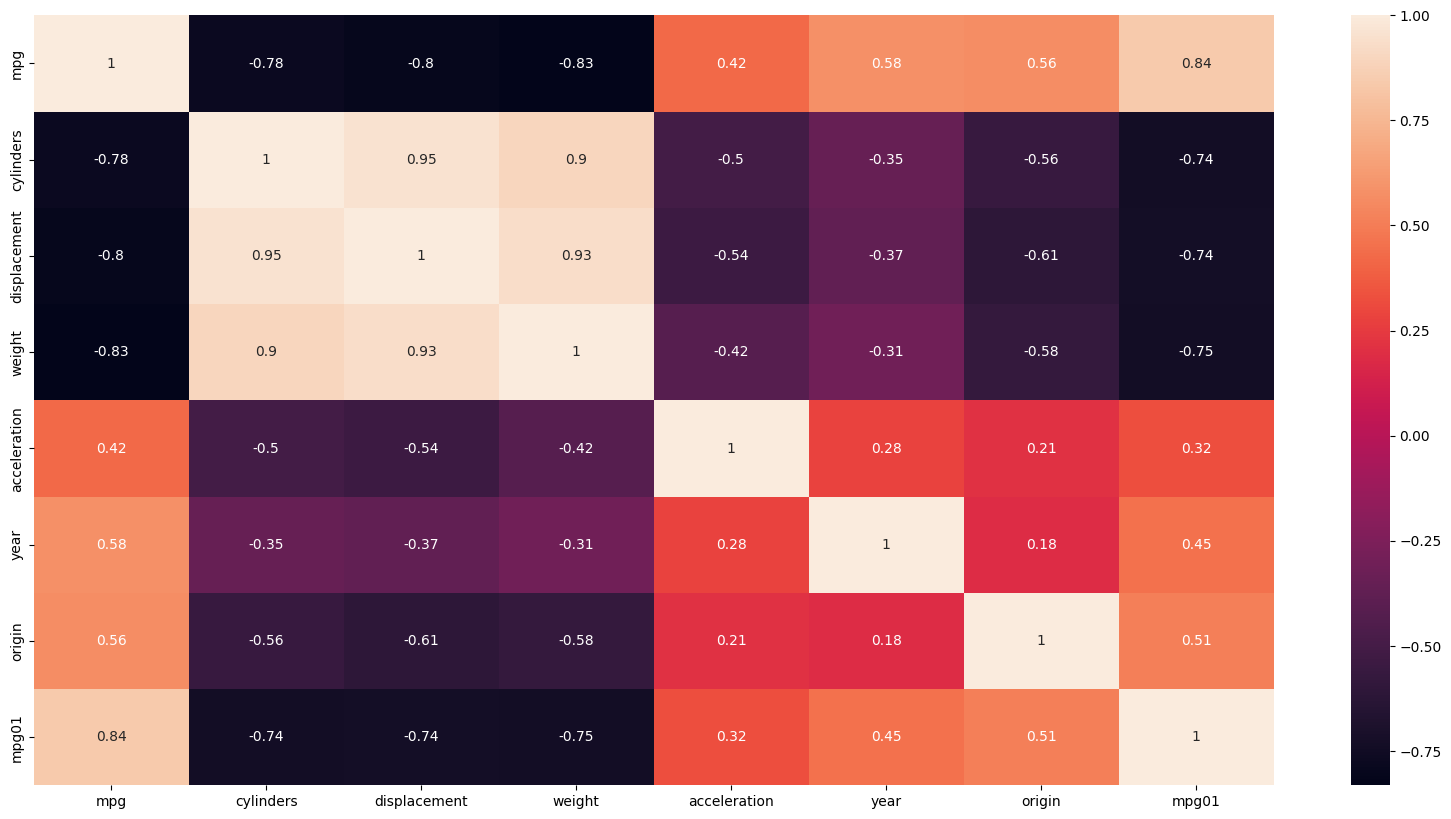

In [157]:
##To explore the data, we are using a heatmap and a pairplot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

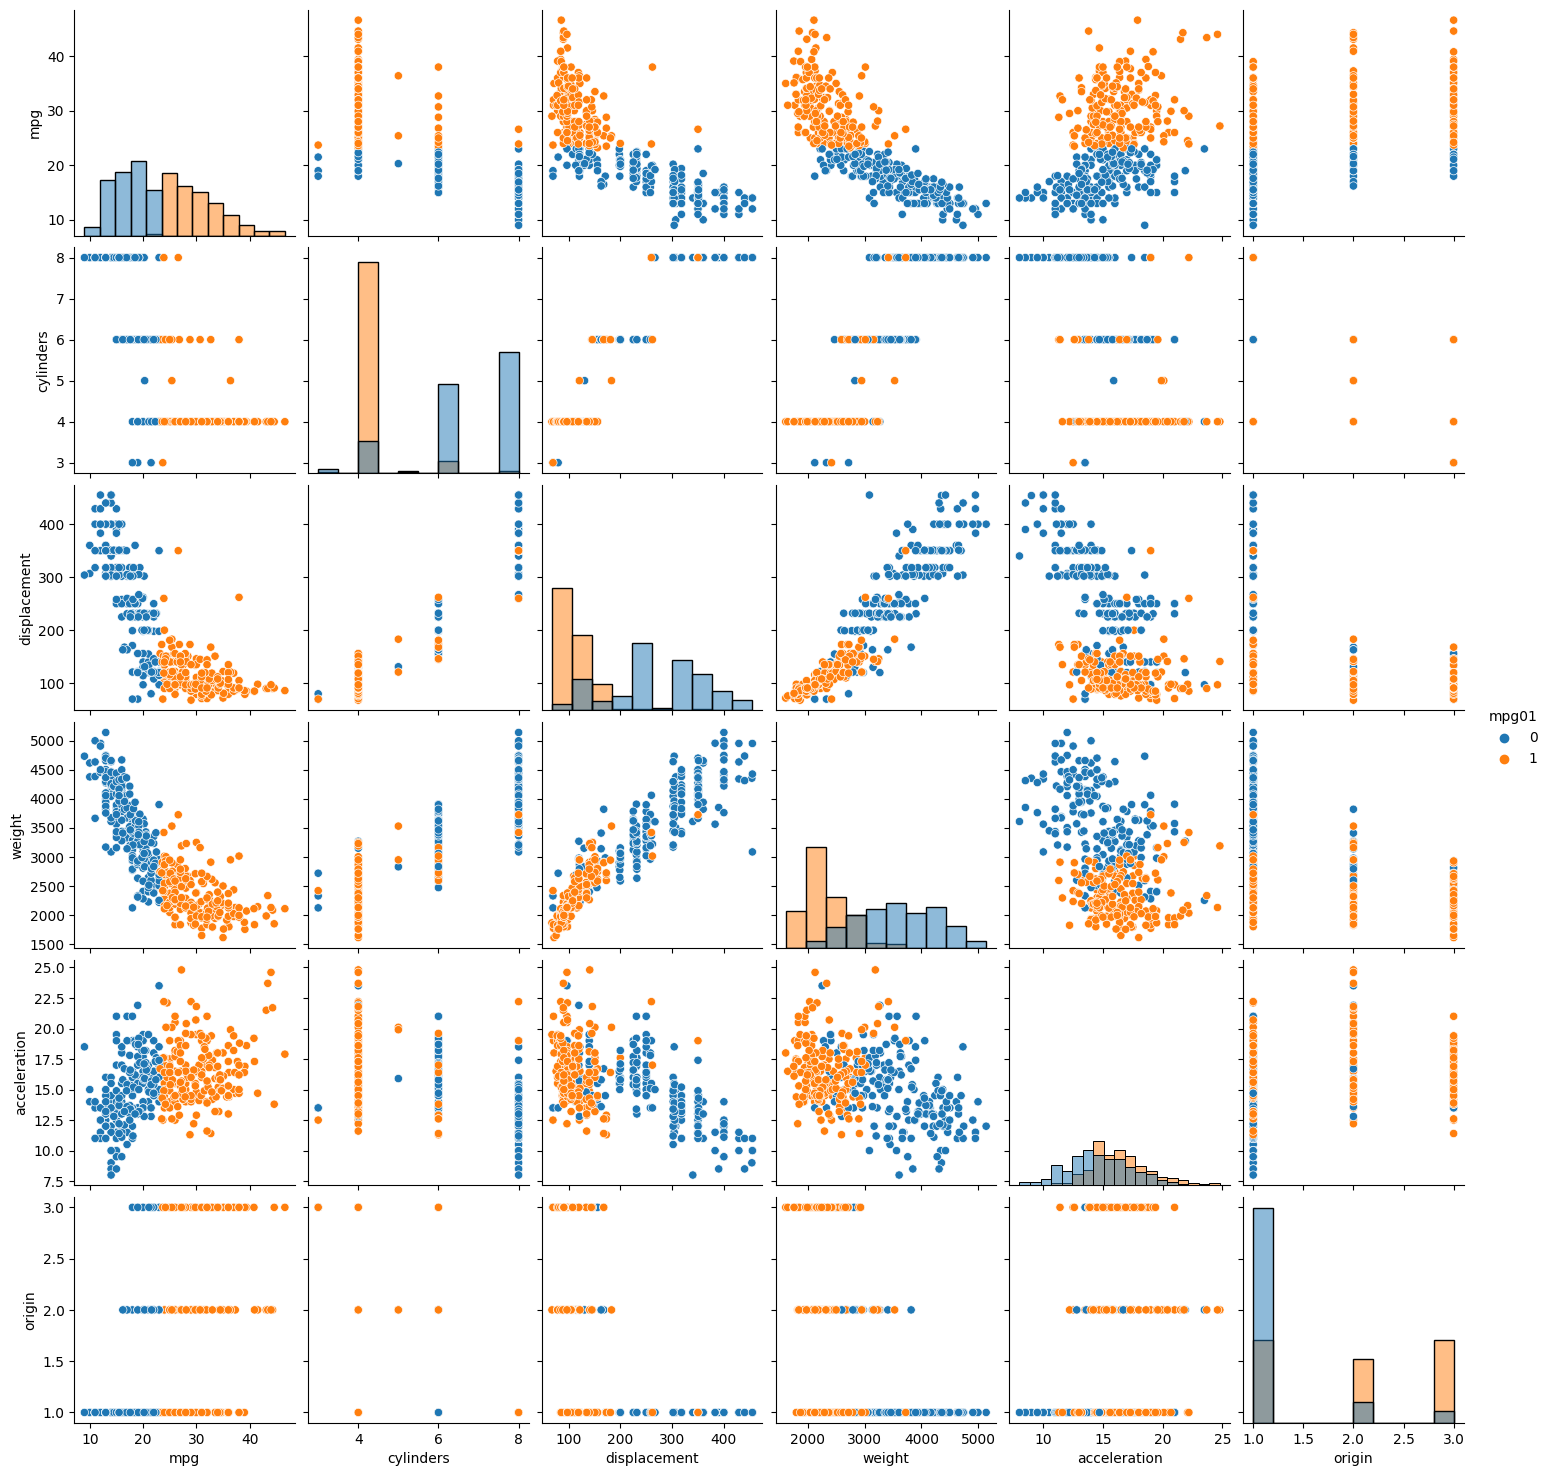

In [158]:
##Then the pair plot
sns.pairplot(df.drop(columns = ['year', 'name']),hue='mpg01',diag_kind = 'hist')
plt.show()

From the plots above, I dedudecd that thee variables with the most correlation to the mpg01 variable are the 'displacement' and the 'weight' variable. This can be seen from the values on the heatmap and the graphs on the pairplot.

## Task 3: (1 mark)

Split the data into a training set and a test set.

### Solution:

In [159]:
##Spliting the data into training set and test set

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(columns = ['mpg01', 'name', 'horsepower'])
#dropped the name and horsepower columns above because they are strings

y = df.mpg01

X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 15)

## Task 4: (4 marks)

Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in task 2. Describe the model performance.

### Solution:

In [160]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)

print('The accuarcy on the test set is %.2f percent'%(100*acc))

The accuarcy on the test set is 98.75 percent


In [161]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.98      1.00      0.99        41

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



The performance of the LDA model is optimal, as seen from the accuracy of the test set. It recorded an accuracy of 98.75%. A classification report was also developed. Here, the precision of the low mileage binary option is 1.00, which means it produced no false positives, while the precision of high mileage variable is .98%.

## Task 5: (4 marks)

Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in task 2. Describe the model performance.

### Solution:

In [162]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_qda = QuadraticDiscriminantAnalysis()

clf_qda.fit(X_train, y_train)

acc_qda = clf_qda.score(X_test, y_test)

print('The accuarcy on the test set is %.2f percent'%(100*acc_qda))

The accuarcy on the test set is 95.00 percent


In [163]:
print(classification_report(y_test, clf_qda.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        39
           1       0.91      1.00      0.95        41

    accuracy                           0.95        80
   macro avg       0.96      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



Here, the accuracy of the model on the test set is 95%, which is lower than that of the LDA. That initially implies that the LDA model did a better job on the given dataset. The predicted low mileage  variables here also have a precision of 1.00, but the precision of the high mileage variables is .91%, which implies that we have some false positive on this model, more than that of the LDA.

## Task 6: (4 marks)

Perform Logistic Regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in task 2. Describe the model performance. Try to interpret your model. 

### Solution:

In [164]:
##Using scikit-learn to import the logistic regression model
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix

##we then ndrop the columns that we dont need.
features = X.drop(columns = ['mpg', 'cylinders', 'origin', 'acceleration', 'year'])

len(features.columns)

2

In [165]:
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size = 0.2, random_state = 20)

In [166]:
logistic_model = LogisticRegression()

In [167]:
##We scale the variable to make sure they are uniform

scaler = StandardScaler().fit(X_train)

X_train_s = scaler.transform(X_train)

X_test_s = scaler.transform(X_test)

In [168]:
logistic_model.fit(X_train_s, y_train)

LogisticRegression()

Then we find out the accuracy of the logistic regression model on the training set

In [169]:
acc_train = logistic_model.score(X_train_s, y_train)
print('The accuracy score of this logistic regression classifier on training set is: %f' %acc_train)

The accuracy score of this logistic regression classifier on training set is: 0.864353


In [170]:
acc = logistic_model.score(X_test_s, y_test)
print('The accuracy score of this logistic regression classifier on test set is: %f' %acc)

The accuracy score of this logistic regression classifier on test set is: 0.925000


In [171]:
#Confusion Matrix for the training set

from sklearn.metrics import confusion_matrix, classification_report

Y_pred = logistic_model.predict(X_train_s)

cm = confusion_matrix(y_train, Y_pred)

df = pd.DataFrame(data = cm, columns = ['Predicted 0', 'Predicted 1'], index= ['True label 0', 'True label 1'])

display(df)

Predicted 0  Predicted 1
True label 0          142           29
True label 1           14          132

Here, the accuracy of the Logistic regression model on the training dataset is 86%. We had 29 wrong predictions fro low mileage cars and 14 wrong prediction for high mileage cars. Its overall accuracy is good, seeing as we have significantly more correct predictions than wrong ones.

## Task 7: (2 marks)

Compare the previous classification methods. Describe your findings. 

From the above models, comparing the accuracy found, the Linear Discriminant Analysis model turns out to be the best out of all of them. It has a higher accuracy and delivered less false entries.

### Solution:

# Problem 2: (15 marks)

Using the Boston data (url can be found below), fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and QDA models using various subsets of the predictors and compare. Describe your findings.

In [172]:
url_boston = 'https://github.com/JWarmenhoven/ISLR-python/raw/master/Notebooks/Data/Boston.csv'

## Solution:

In [173]:
##Import necessary packages
import numpy as np
import pandas as pd

#Import the data
df1 = pd.read_csv('https://github.com/JWarmenhoven/ISLR-python/raw/master/Notebooks/Data/Boston.csv')
df1

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [174]:
#Next calculate the median of the crime rate
median = df1['crim'].median()
median

0.25651

In [175]:
##Then create the binary variable mpg01
df1['crim01'] = df1['crim'].apply(lambda x: 1 if x > median else 0)

df1

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  crim01  
0       15.3  396.90   4.98  24.0       0  
1       17.8  396.90   9.14  21.6       0  
2       17.8  392.83   4.03  34.7       0  
3       18.7  394.63   2.94  33.4       0  
4       18.7  396.90   5.33  36.2       0  
..       ...     ...    ...   ...     ...  
501     21.0  391.99   9.67  22.4       0  
502     21.0  396.90   9.08  20.6       0  
503     21.0  396.90   5.64  23.9       0  
504     21.0  393.45   6.48  22.0       0  
505     21.0  396.90   7.88  11.9       0  

[506 rows x 15 columns]

In [176]:
#Next, we move the crim01 variable next to the crim variable

print(df1.columns.values)

['crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'ptratio'
 'black' 'lstat' 'medv' 'crim01']


In [177]:
df1 = df1[['crim','crim01','zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio',
 'black', 'lstat', 'medv']]

df1

crim  crim01    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632       0  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731       0   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729       0   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237       0   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905       0   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...     ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263       0   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527       0   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076       0   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959       0   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741       0   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 15 columns]

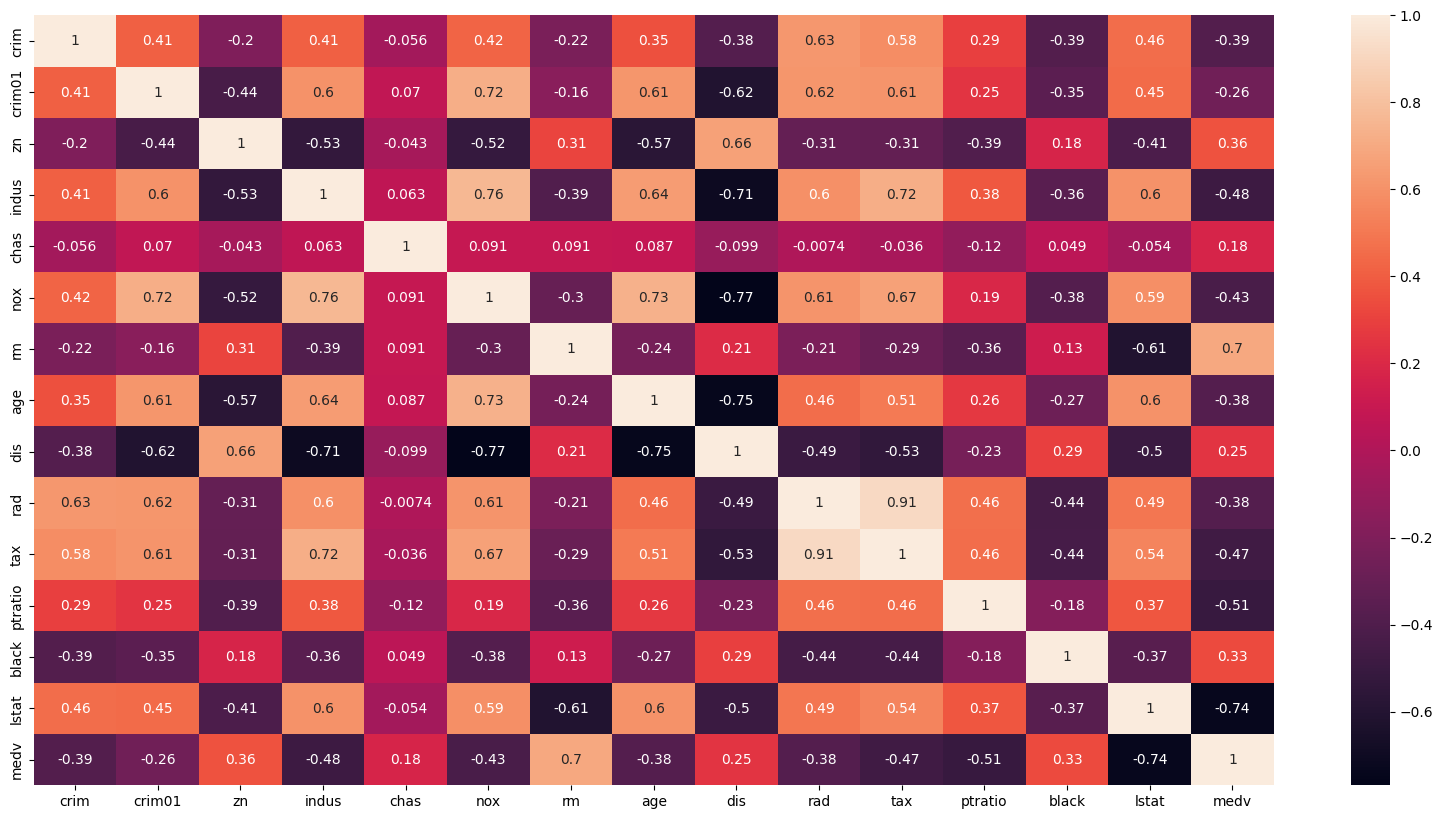

In [178]:
##To explore the data, we are using a heatmap and a pairplot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
sns.heatmap(df1.corr(), annot=True)
plt.show()

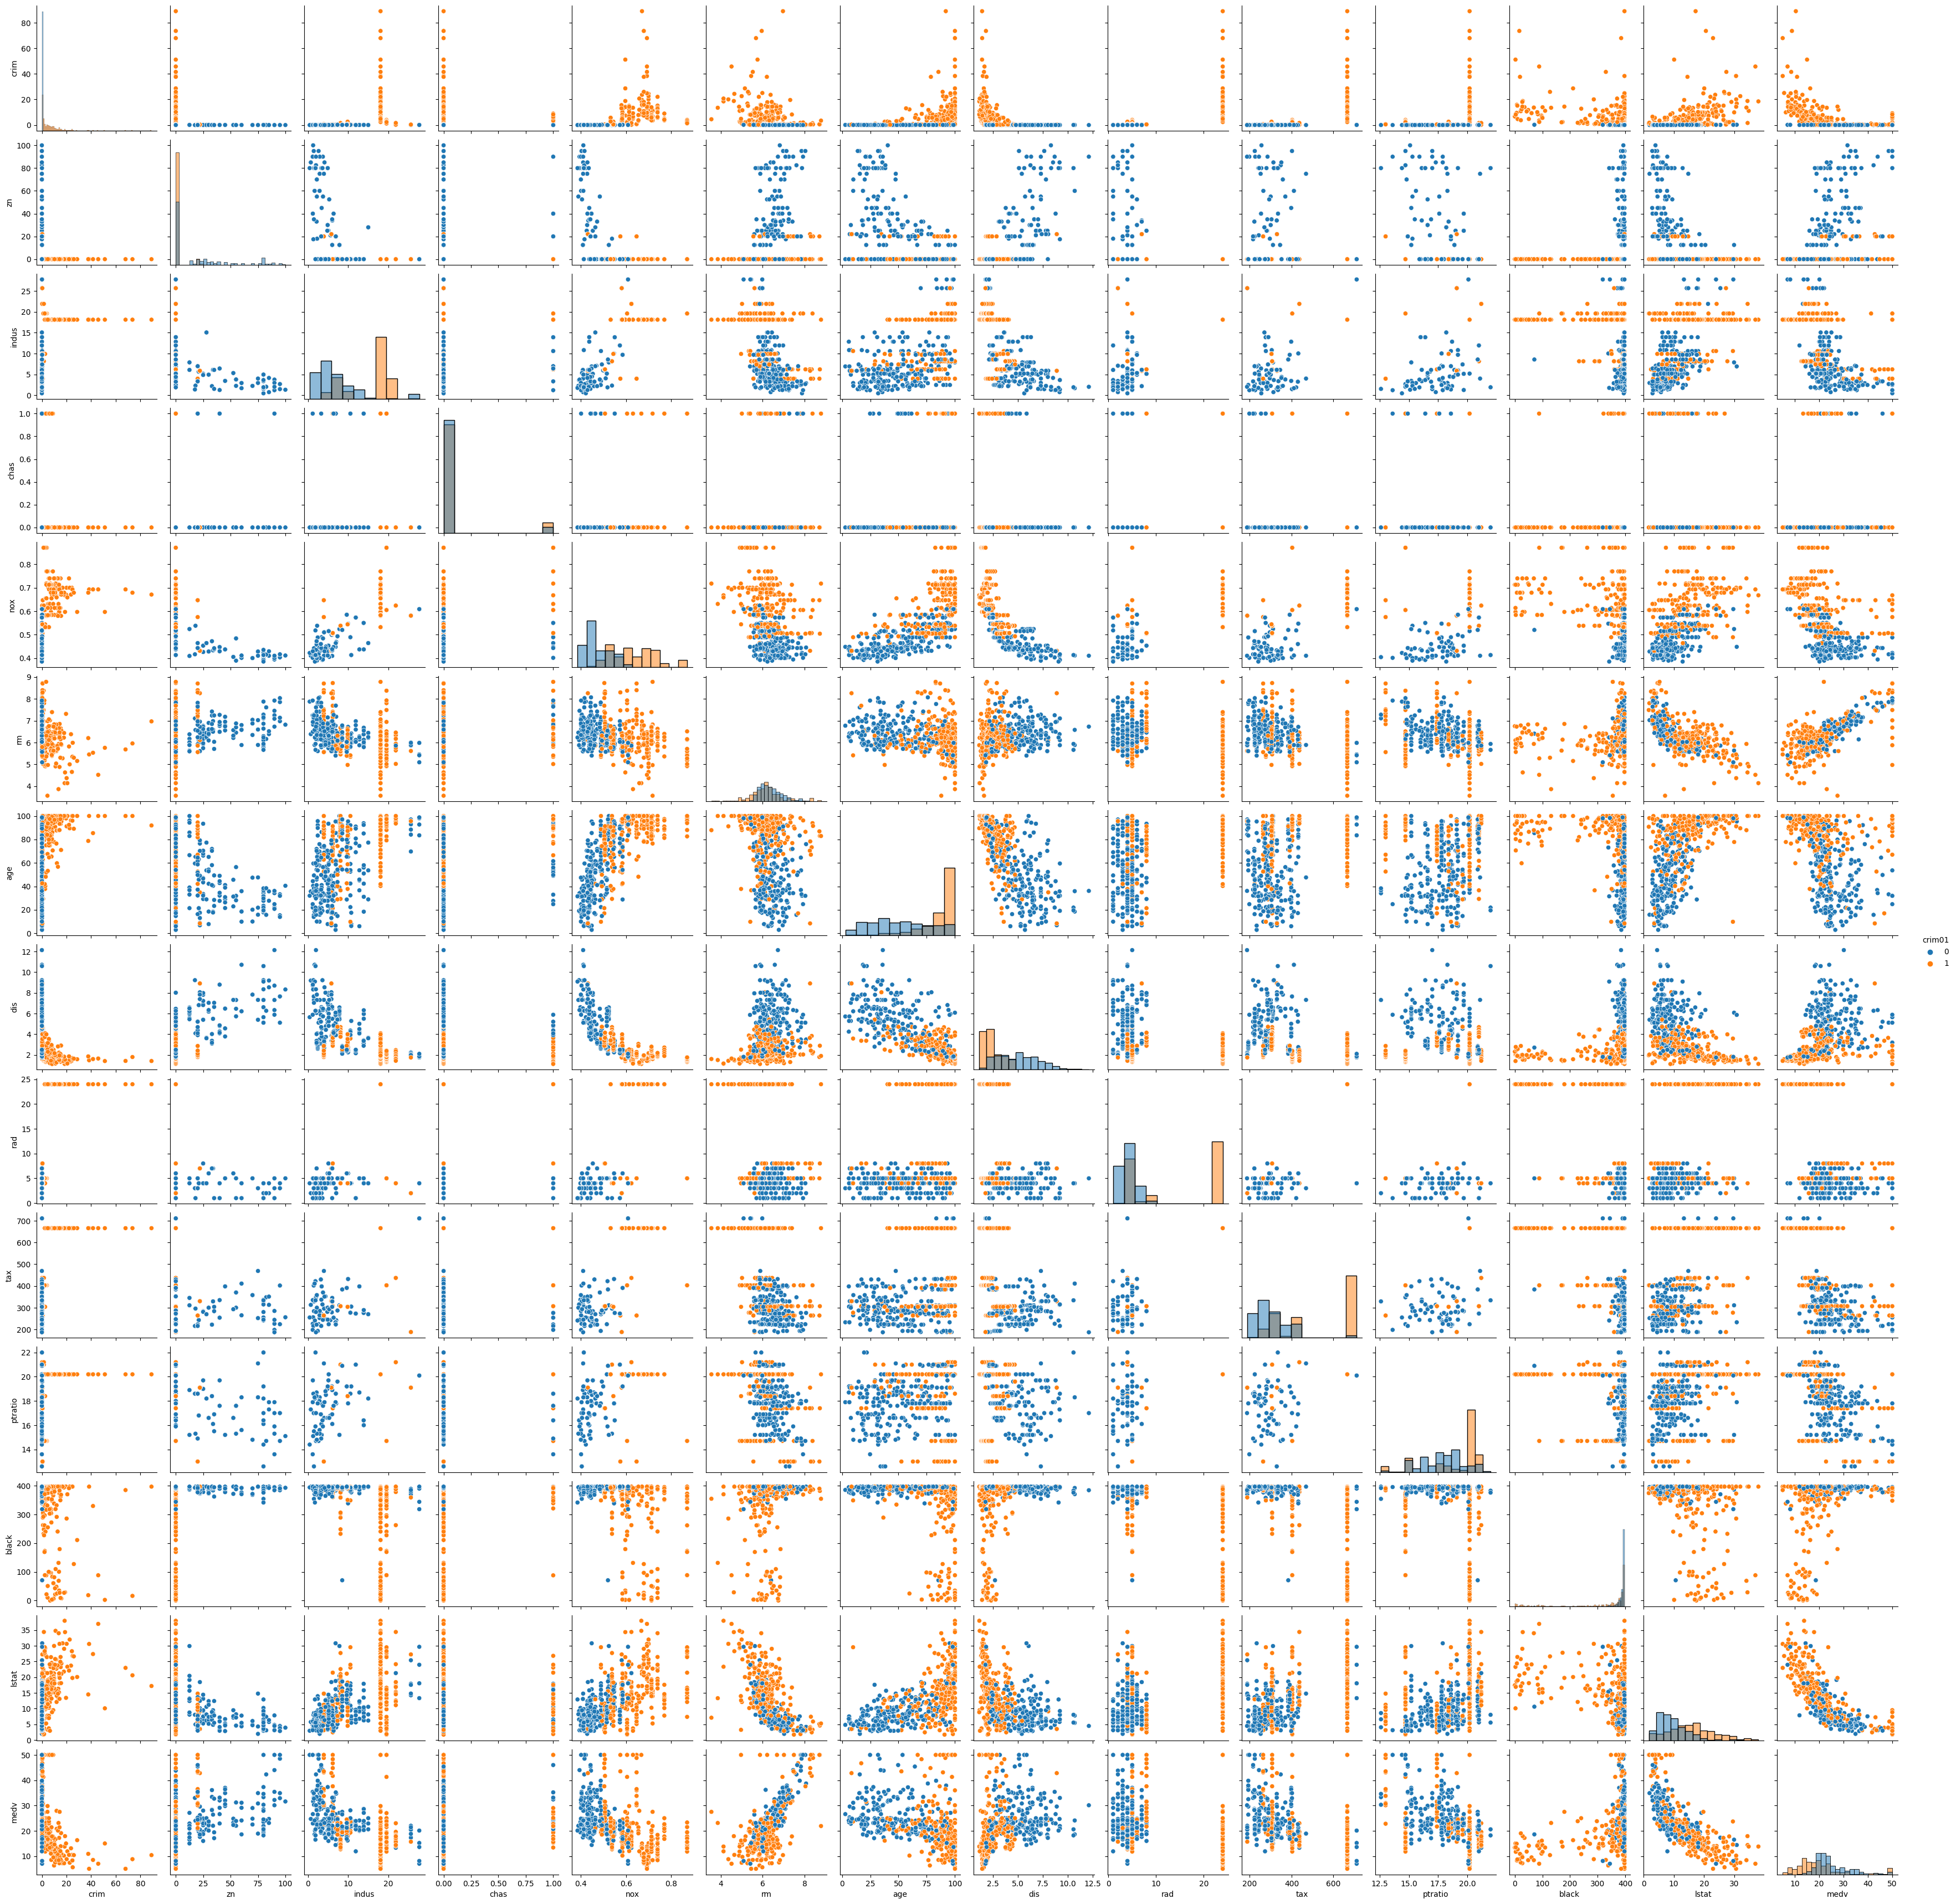

In [179]:
##Then the pair plot
sns.pairplot(df1,hue='crim01',diag_kind = 'hist')
plt.show()

"nox" and "rad" have the most correlation so we are working with that

In [180]:
##Spliting the data into training set and test set

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

X = df1.drop(columns = ['crim','crim01','zn', 'indus', 'chas', 'rm', 'age', 'dis', 'tax', 'ptratio',
 'black', 'lstat', 'medv'])


y = df1.crim01

X_train,  X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 15)

In [181]:
#The LDA model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)

print('The accuarcy on the test set is %.2f percent'%(100*acc))

The accuarcy on the test set is 89.22 percent


In [182]:
#The QDA model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf_qda = QuadraticDiscriminantAnalysis()

clf_qda.fit(X_train, y_train)

acc_qda = clf_qda.score(X_test, y_test)

print('The accuarcy on the test set is %.2f percent'%(100*acc_qda))

The accuarcy on the test set is 88.24 percent


In [183]:
#The Logistic regression model
logistic_model = LogisticRegression()

In [184]:
scaler = StandardScaler().fit(X_train)

X_train_s = scaler.transform(X_train)

X_test_s = scaler.transform(X_test)

In [185]:
logistic_model.fit(X_train_s, y_train)

LogisticRegression()

In [186]:
#Logistic model on the training set
acc_train = logistic_model.score(X_train_s, y_train)
print('The accuracy score of this logistic regression classifier on training set is: %f' %acc_train)

The accuracy score of this logistic regression classifier on training set is: 0.816832


In [187]:
#Logistic model on the test set
acc = logistic_model.score(X_test_s, y_test)
print('The accuracy score of this logistic regression classifier on test set is: %f' %acc)

The accuracy score of this logistic regression classifier on test set is: 0.882353


From all three model carried out above, the LDA model came out with the best accuracy, while the QDA and Logistic model had similar accuracies.

# Problem 3: (15 marks)

The dataset for this problem can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) and was created by Dr. William H. Wolberg, Nick Street and Olvi L. Mangasarian.

The below information is taken from the link above:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

**Attribute Information:**

1. ID number 
2. Diagnosis (M = malignant, B = benign) 
3-32) 

**Ten real-valued features are computed for each cell nucleus:** 

3. radius (mean of distances from center to points on the perimeter) 
4. texture (standard deviation of gray-scale values) 
5. perimeter 
6. area 
7. smoothness (local variation in radius lengths) 
8. compactness (perimeter^2 / area - 1.0) 
9. concavity (severity of concave portions of the contour) 
10. concave points (number of concave portions of the contour) 
11. symmetry 
12. fractal dimension ("coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.


### Task:

Fit classification models in order to predict the `Diagnosis` variable. Explore logistic regression, LDA, and QDA models using various subsets of the predictors and compare. Describe your findings.

### Solution

In [188]:
##Import necessary packages
import numpy as np
import pandas as pd



In [189]:
#Import the data
columns = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean',                
'fractal_dimension_mean',       
'radius_se',                    
'texture_se',                   
'perimeter_se',                
'area_se',                     
'smoothness_se',                
'compactness_se',              
'concavity_se',                 
'concave points_se',           
'symmetry_se' ,                 
'fractal_dimension_se',       
'radius_worst',                
'texture_worst',             
'perimeter_worst',              
'area_worst',            
'smoothness_worst',             
'compactness_worst',           
'concavity_worst',              
'concave_points_worst',        
'symmetry_worst',               
'fractal_dimension_worst', 'Unnamed: 32']




df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header = None, names = columns)
df2

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave_points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [190]:
df3 = df2.replace({'B':0,'M':1})
list = ['Unnamed: 32','id','diagnosis']
X = df2.drop(list,axis = 1)

y = df2.diagnosis 

df3

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave_points_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                0.14710  ...          17.33           184.60      2019.0   
1                0.07017  ...          23.41           158.80      1956.0   
2                0.12790  ...          25.53           152.50      1709.0   
3                0.10520  ...          26.50            98.87       567.7   
4                0.10430  ...          16.67           152.20      1575.0   
..                   ...  ...            ...              ...         ...   
564              0.13890  ...          26.40           166.10      2027.0   
565              0.09791  ...          38.25           155.00      1731.0   
566              0.05302  ...          34.12           126.70      1124.0   
567              0.15200  ...          39.42           184.60      1821.0   
568              0.00000  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  \
0                  0.2654          0.4601                  0.11890   
1                  0.1860          0.2750                  0.08902   
2                  0.2430          0.3613                  0.08758   
3                  0.2575          0.6638                  0.17300   
4                  0.1625          0.2364                  0.07678   
..                    ...             ...                      ...   
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06637   
566                0.1418          0.2218

Prepare plots to find the correlation between Diagnosis and the other variables

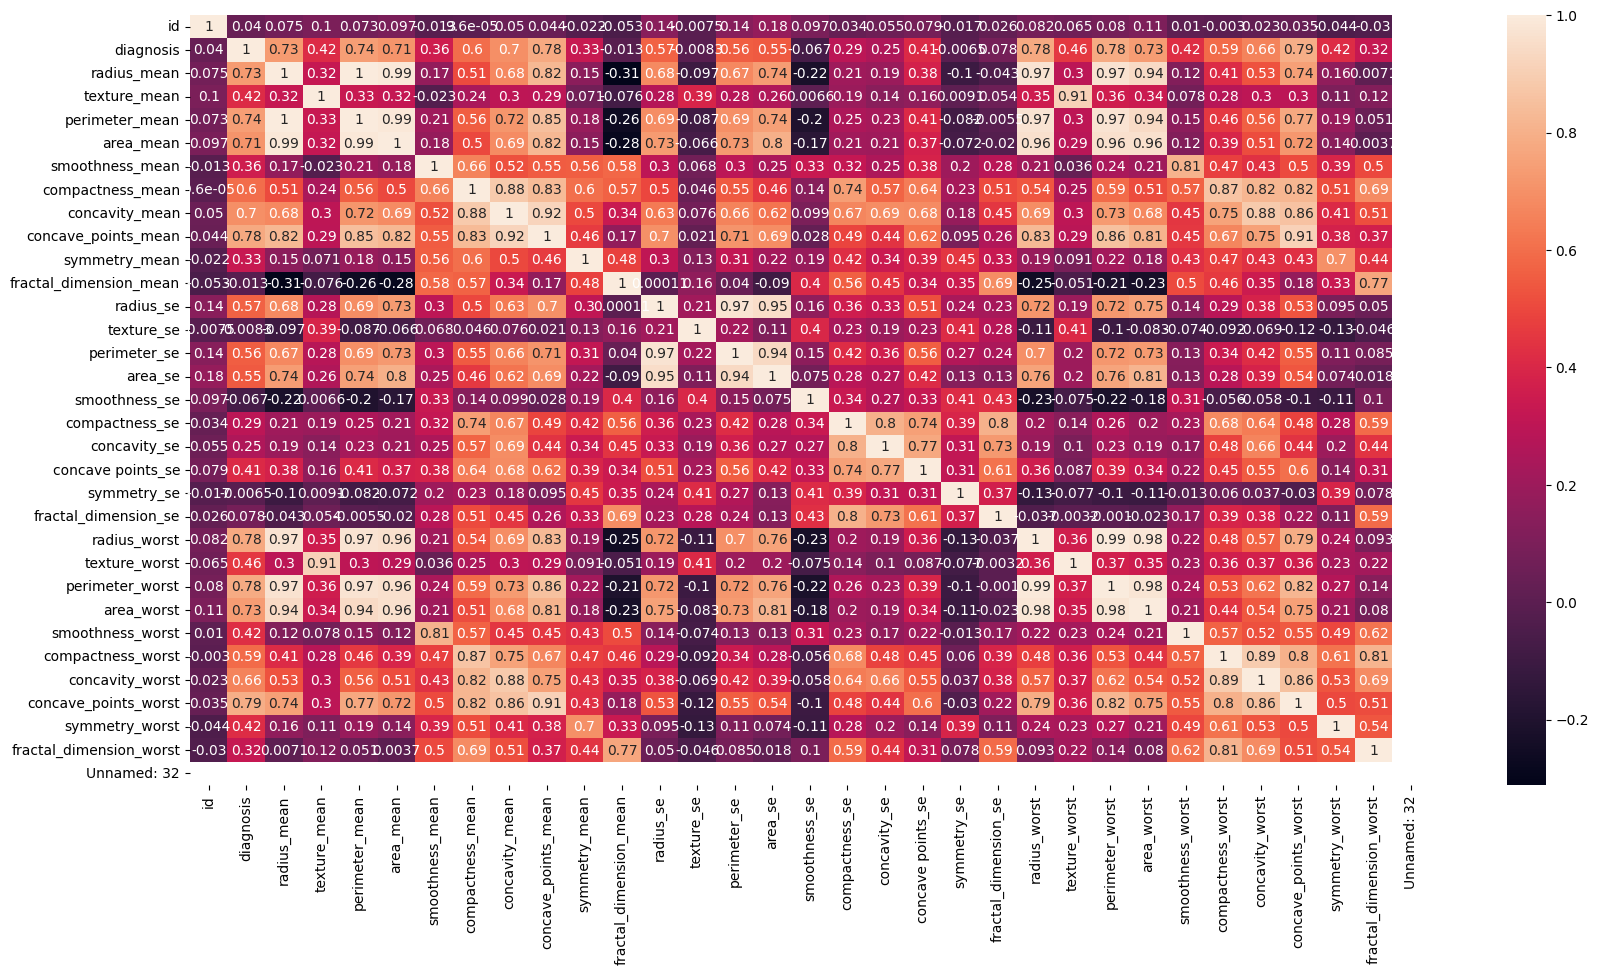

In [191]:
#Heatmap

plt.figure(figsize = (20,10))
sns.heatmap(df3.corr(), annot=True)
plt.show()

In [192]:
##We have selected the radius mean and the perimeter mean as the most correlated variables with diagnosis. Now, we split the data into training and test sets

X_x = df3.drop(columns = ['id','diagnosis','texture_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean',                
'fractal_dimension_mean',       
'radius_se',                    
'texture_se',                   
'perimeter_se',                
'area_se',                     
'smoothness_se',                
'compactness_se',              
'concavity_se',                 
'concave points_se',           
'symmetry_se' ,                 
'fractal_dimension_se',       
'radius_worst',                
'texture_worst',             
'perimeter_worst',              
'area_worst',            
'smoothness_worst',             
'compactness_worst',           
'concavity_worst',              
'concave_points_worst',        
'symmetry_worst',               
'fractal_dimension_worst', 'Unnamed: 32'])


y_y = y

X_train,  X_test, y_train, y_test = train_test_split(X_x,y_y,test_size = 0.2 , random_state = 15)

In [193]:
#The LDA model

clf = LinearDiscriminantAnalysis()

clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)

print('The accuarcy on the test set is %.2f percent'%(100*acc))

The accuarcy on the test set is 86.84 percent


In [194]:
#The QDA model

clf_qda = QuadraticDiscriminantAnalysis()

clf_qda.fit(X_train, y_train)

acc_qda = clf_qda.score(X_test, y_test)

print('The accuarcy on the test set is %.2f percent'%(100*acc_qda))

The accuarcy on the test set is 89.47 percent


In [195]:
#The Logistic regression model
logistic_model = LogisticRegression()


In [196]:
scaler = StandardScaler().fit(X_train)

X_train_s = scaler.transform(X_train)

X_test_s = scaler.transform(X_test)

In [197]:
logistic_model.fit(X_train_s, y_train)

LogisticRegression()

In [198]:
#Logistic model on the training set
acc_train = logistic_model.score(X_train_s, y_train)
print('The accuracy score of this logistic regression classifier on training set is: %f' %acc_train)

The accuracy score of this logistic regression classifier on training set is: 0.890110


In [199]:
#Logistic model on the test swt
acc = logistic_model.score(X_test_s, y_test)
print('The accuracy score of this logistic regression classifier on test set is: %f' %acc)

The accuracy score of this logistic regression classifier on test set is: 0.850877


After running LDA, QDA, and Logistic Regression models on the subsets, the accuracies are as follows

LDA = 86.84%
QDA = 89.47%
Logistic = 85.09%

From the above, the quadratic discriminant analysis model did the best on the data.